# Below are done for StackOverflow 10% Sample

# Import and prepare data

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
stackSampleTags = pd.read_csv('sampleTags.csv', encoding='latin1')

In [3]:
stackSampleTags.rename(columns={'Id':'QuestionId', 'Tag':'QuestTags'}, inplace=True)

In [4]:
stackSampleQuestions = pd.read_csv('SampleQuestions.csv', encoding='latin1')

In [5]:
stackSampleQuestions.rename(columns={'Id':'QuestionId', 'OwnerUserId':'QuestUserId', 'CreationDate':'QuestCreationDate', 'ClosedDate':'QuestClosedDate', 'Score':'QuestScore', 'Body':'QuestBody', 'Title':'QuestTitle'}, inplace=True)

In [6]:
stackSampleQuestions["QuestCreationDate"] = pd.to_datetime(stackSampleQuestions["QuestCreationDate"])

In [7]:
mask4 = (stackSampleQuestions['QuestCreationDate'] >= datetime.strptime('2008-10-15', '%Y-%m-%d')) & (stackSampleQuestions['QuestCreationDate'] <= datetime.strptime('2016-10-12', '%Y-%m-%d'))

In [8]:
stackSampleQuestions = stackSampleQuestions.loc[mask4]

In [9]:
stackSampleQuestions = stackSampleQuestions[stackSampleQuestions['QuestClosedDate'].isnull()]

In [10]:
stackQuestionsTags = pd.merge(stackSampleQuestions, stackSampleTags, on='QuestionId')

In [11]:
stackQuestionsTags = stackQuestionsTags.copy()

In [12]:
stackQuestionsTags.ix[(stackQuestionsTags['QuestCreationDate'] >= datetime.strptime('2008-10-15', '%Y-%m-%d')) & (stackQuestionsTags['QuestCreationDate'] < datetime.strptime('2009-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'08-09"
stackQuestionsTags.ix[(stackQuestionsTags['QuestCreationDate'] >= datetime.strptime('2009-10-15', '%Y-%m-%d')) & (stackQuestionsTags['QuestCreationDate'] < datetime.strptime('2010-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'09-10"
stackQuestionsTags.ix[(stackQuestionsTags['QuestCreationDate'] >= datetime.strptime('2010-10-15', '%Y-%m-%d')) & (stackQuestionsTags['QuestCreationDate'] < datetime.strptime('2011-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'10-11"
stackQuestionsTags.ix[(stackQuestionsTags['QuestCreationDate'] >= datetime.strptime('2011-10-15', '%Y-%m-%d')) & (stackQuestionsTags['QuestCreationDate'] < datetime.strptime('2012-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'11-12"
stackQuestionsTags.ix[(stackQuestionsTags['QuestCreationDate'] >= datetime.strptime('2012-10-15', '%Y-%m-%d')) & (stackQuestionsTags['QuestCreationDate'] < datetime.strptime('2013-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'12-13"
stackQuestionsTags.ix[(stackQuestionsTags['QuestCreationDate'] >= datetime.strptime('2013-10-15', '%Y-%m-%d')) & (stackQuestionsTags['QuestCreationDate'] < datetime.strptime('2014-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'13-14"
stackQuestionsTags.ix[(stackQuestionsTags['QuestCreationDate'] >= datetime.strptime('2014-10-15', '%Y-%m-%d')) & (stackQuestionsTags['QuestCreationDate'] < datetime.strptime('2015-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'14-15"
stackQuestionsTags.ix[(stackQuestionsTags['QuestCreationDate'] >= datetime.strptime('2015-10-15', '%Y-%m-%d')) & (stackQuestionsTags['QuestCreationDate'] < datetime.strptime('2016-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'15-16"

In [13]:
stackQuestionsTags.rename(columns={'Tag':'QuestTags'}, inplace=True)

In [14]:
stackQuestionsTags.head()

,QuestionId,QuestUserId,QuestCreationDate,QuestClosedDate,QuestScore,QuestTitle,QuestBody,QuestTags,QuestCreationYear
0,203340,27580.0,2008-10-15 00:35:54,NaN,32,"JQuery: Current, Well-Formatted, Printable Doc...","<p>I'm looking for a current (1.2), well-forma...",jquery,Oct'08-09
1,203520,5496.0,2008-10-15 02:19:28,NaN,2,How do I discriminate between data binding and...,<p>I have what must be a typical catch-22 prob...,.net,Oct'08-09
2,203520,5496.0,2008-10-15 02:19:28,NaN,2,How do I discriminate between data binding and...,<p>I have what must be a typical catch-22 prob...,winforms,Oct'08-09
3,203520,5496.0,2008-10-15 02:19:28,NaN,2,How do I discriminate between data binding and...,<p>I have what must be a typical catch-22 prob...,data-binding,Oct'08-09
4,203590,361.0,2008-10-15 03:05:53,NaN,0,Include directory in VS 2003,<p>Where is the setting in Visual Studio 2003 ...,visual-studio,Oct'08-09


In [15]:
stackSampleAnswers = pd.read_csv('sampleAnswers.csv', encoding='latin1')

In [16]:
stackSampleAnswers.rename(columns={'Id':'AnswerId', 'CreationDate':'AnsCreationDate', 'ParentId':'QuestionId', 'Score':'AnsScore', 'Body':'AnsBody'}, inplace=True)

# Graph Plot 1: Number of Questions Created Every Year

In [17]:
import seaborn as sns

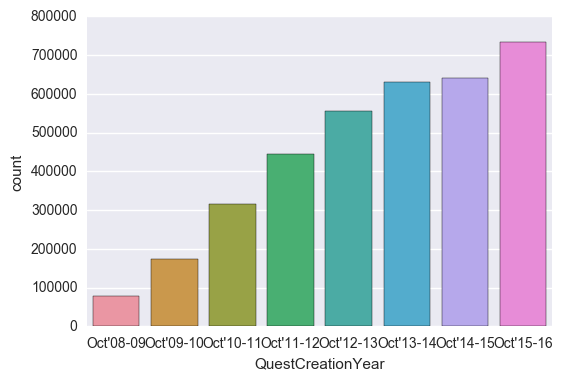

In [18]:
#number of tags used over the years
%matplotlib inline
ax = sns.countplot(x="QuestCreationYear", data=stackQuestionsTags)

In [19]:
#36763 unique QuestTags, tail(23300)
yearQuestTag = pd.DataFrame(stackQuestionsTags.groupby('QuestCreationYear').QuestTags.value_counts().rename('YearTagCount')).reset_index()

In [20]:
yearQuestTag.head()

,QuestCreationYear,QuestTags,YearTagCount
0,Oct'08-09,c#,3682
1,Oct'08-09,.net,2014
2,Oct'08-09,java,1846
3,Oct'08-09,asp.net,1710
4,Oct'08-09,php,1468


In [21]:
#realise iphone tag was changed to ios
yearQuestTag = yearQuestTag.replace("iphone", "ios")

In [22]:
topYearQuestTag = yearQuestTag.groupby('QuestCreationYear').head(10)

In [23]:
topYearQuestTag.head()

,QuestCreationYear,QuestTags,YearTagCount
0,Oct'08-09,c#,3682
1,Oct'08-09,.net,2014
2,Oct'08-09,java,1846
3,Oct'08-09,asp.net,1710
4,Oct'08-09,php,1468


In [24]:
yearCount = yearQuestTag.groupby('QuestCreationYear').YearTagCount.agg('sum').rename('TotalYearCount').reset_index()

In [25]:
topYearQuestTag = pd.merge(topYearQuestTag, yearCount, on='QuestCreationYear')

In [26]:
topYearQuestTag['Percentage'] = topYearQuestTag.YearTagCount * 100 / topYearQuestTag.TotalYearCount

In [27]:
tomerge = topYearQuestTag.groupby('QuestCreationYear').YearTagCount.agg('sum').rename('TopTagTotalCount').reset_index()

In [28]:
topYearQuestTag = pd.merge(topYearQuestTag, tomerge, on='QuestCreationYear')

In [29]:
topYearQuestTag['PercentageAmongstTop'] = topYearQuestTag.YearTagCount * 100 / topYearQuestTag.TopTagTotalCount

In [30]:
topYearQuestTag.sort_values(['QuestCreationYear', 'QuestTags'], inplace=True)

In [31]:
topYearQuestTag.head(40)

,QuestCreationYear,QuestTags,YearTagCount,TotalYearCount,Percentage,TopTagTotalCount,PercentageAmongstTop
1,Oct'08-09,.net,2014,77299,2.605467,16374,12.299988
3,Oct'08-09,asp.net,1710,77299,2.212189,16374,10.443386
0,Oct'08-09,c#,3682,77299,4.763322,16374,22.486869
6,Oct'08-09,c++,1285,77299,1.662376,16374,7.847807
8,Oct'08-09,ios,988,77299,1.278154,16374,6.033956
2,Oct'08-09,java,1846,77299,2.388129,16374,11.273971
5,Oct'08-09,javascript,1382,77299,1.787863,16374,8.440210
9,Oct'08-09,jquery,976,77299,1.262630,16374,5.960669
4,Oct'08-09,php,1468,77299,1.899119,16374,8.965433
7,Oct'08-09,python,1023,77299,1.323432,16374,6.247710


# Graph Plot 2: Change in Top 10 Tags Over  the Years

In [32]:
from bokeh.charts import Bar, show, output_notebook
from bokeh.models import HoverTool

output_notebook()

palette = ['#4B0082','#FF6347','#F0E68C','#E6E6FA','#FFF0F5','#90EE90','#ADD8E6','#F08080','#D3D3D3','#FFB6C1','#87CEFA','#20B2AA','#FFA07A','#778899','#9370DB','#40E0D0']

bar = Bar(topYearQuestTag, values='PercentageAmongstTop', label='QuestCreationYear', stack='QuestTags',
          title='Top 10 Tags Used Throughout the Years', legend=False, 
              bar_width=1.0, palette=palette, tools='hover', line_color=['YearTagCount', 'PercentageAmongstTop'])

hover = bar.select(dict(type=HoverTool))
hover.tooltips = [('Tag','@QuestTags'), ('Yearly Tag Count','@YearTagCount'), 
                      ('Percentage of Tag Used','@PercentageAmongstTop{1.11}%')]

bar.xaxis.axis_label = 'Year in which Question was Created'
bar.yaxis.axis_label = 'Percentage of Top Tags Used in Questions Yearly (%)'

show(bar)

Loading BokehJS ...

In [33]:
stackQuestionsTags.groupby('QuestCreationYear').QuestTags.value_counts()

QuestCreationYear  QuestTags         
Oct'08-09          c#                    3682
                   .net                  2014
                   java                  1846
                   asp.net               1710
                   php                   1468
                   javascript            1382
                   c++                   1285
                   python                1023
                   iphone                 988
                   jquery                 976
                   sql                    957
                   sql-server             781
                   html                   713
                   mysql                  664
                   asp.net-mvc            609
                   wpf                    513
                   c                      505
                   css                    487
                   ruby-on-rails          486
                   objective-c            468
                   windows                

In [34]:
stackQuestionsTags.QuestTags.value_counts() #java most tagged

javascript              116962
java                    106687
c#                       95458
php                      91138
android                  86828
jquery                   75081
python                   60313
html                     55087
ios                      44862
c++                      43545
mysql                    39764
css                      39763
sql                      33897
asp.net                  28794
objective-c              25682
ruby-on-rails            25184
.net                     22639
c                        20935
iphone                   20605
angularjs                19827
arrays                   18123
sql-server               17233
json                     16808
ruby                     16280
ajax                     15002
r                        14604
regex                    14248
xml                      14160
node.js                  13976
asp.net-mvc              13784
                         ...  
gradle-ssh-plugin            1
canoo-we

In [35]:
#top 15 tags used
topQuestTags = stackQuestionsTags.QuestTags.value_counts()[0:15]

In [36]:
topQuestTags = topQuestTags.reset_index()
topQuestTags = topQuestTags.rename(columns= {'index':'QuestTags', 'QuestTags':'Count'})

# Graph Plot 3: Frequency of Top 15 Tags Used (in Total for All the Years)

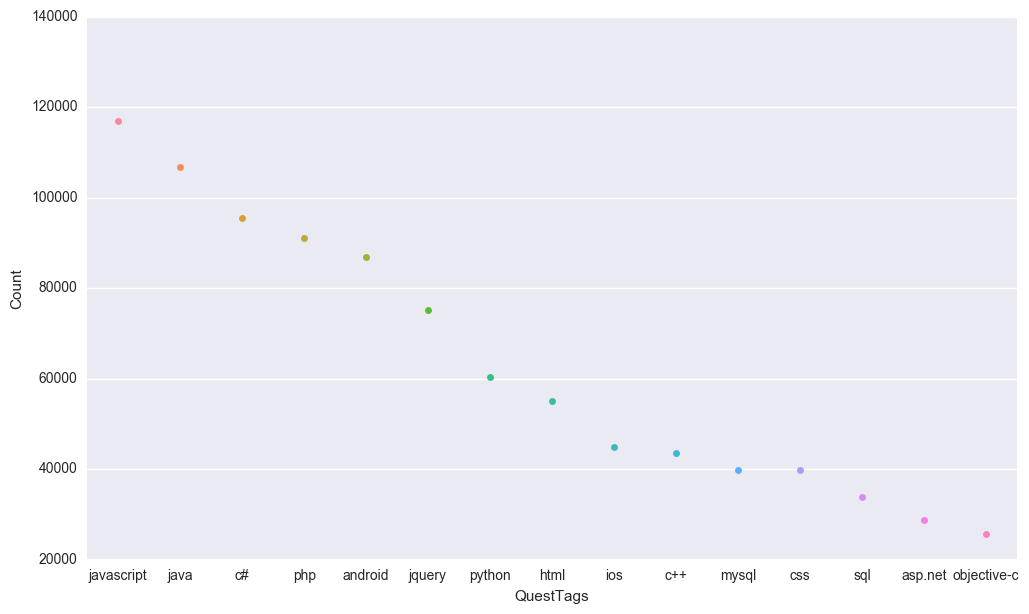

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
ax2 = sns.stripplot(x="QuestTags", y="Count", data=topQuestTags)

In [38]:
questTags = stackQuestionsTags[['QuestionId', 'QuestTags']].groupby('QuestionId').QuestTags.apply(list)

In [39]:
questTags = questTags.reset_index()
len(questTags.QuestTags[1])

3

In [40]:
questTags.head()

,QuestionId,QuestTags
0,203340,[jquery]
1,203520,"[.net, winforms, data-binding]"
2,203590,"[visual-studio, include]"
3,203620,"[layout, internationalization]"
4,203640,[xslt]


# Association Rules Between Question Tags + Network Visualisation (for Stackoverflow 10% Sample)

In [41]:
import pyfpgrowth as fp

In [42]:
questTagList = list(questTags.QuestTags)

In [43]:
#have 2 or more question tags in a question
#filter out only 1 itemset situation
questTagList2 = [tag for tag in questTagList if len(tag)>1]

In [44]:
#put support threshold as 1000
patterns = fp.find_frequent_patterns(questTagList2, 1000)

In [45]:
patterns

{('.htaccess', 'apache'): 1841,
 ('.htaccess', 'apache', 'mod-rewrite'): 1053,
 ('.htaccess', 'mod-rewrite'): 1992,
 ('.htaccess', 'php'): 1767,
 ('.net', 'asp.net'): 1899,
 ('.net', 'asp.net', 'c#'): 1067,
 ('.net', 'c#'): 13567,
 ('.net', 'c#', 'winforms'): 1026,
 ('.net', 'vb.net'): 1322,
 ('.net', 'winforms'): 1430,
 ('.net', 'wpf'): 1222,
 ('actionscript-3',): 3663,
 ('actionscript-3', 'flash'): 1671,
 ('activerecord',): 2199,
 ('activerecord', 'ruby-on-rails'): 1699,
 ('ajax', 'html'): 1335,
 ('ajax', 'javascript'): 6433,
 ('ajax', 'javascript', 'jquery'): 3860,
 ('ajax', 'javascript', 'jquery', 'php'): 1085,
 ('ajax', 'javascript', 'php'): 1783,
 ('ajax', 'jquery'): 8454,
 ('ajax', 'jquery', 'php'): 2400,
 ('ajax', 'json'): 1275,
 ('algorithm',): 5886,
 ('amazon-ec2',): 1390,
 ('amazon-s3',): 1492,
 ('amazon-web-services',): 3031,
 ('android', 'android-activity'): 2093,
 ('android', 'android-asynctask'): 1139,
 ('android', 'android-fragments'): 2759,
 ('android', 'android-intent

In [46]:
rules = fp.generate_association_rules(patterns, 0.5)

In [47]:
rules

{('.htaccess', 'apache'): (('mod-rewrite',), 0.5719717544812601),
 ('.htaccess', 'mod-rewrite'): (('apache',), 0.5286144578313253),
 ('.net', 'asp.net'): (('c#',), 0.5618746708794102),
 ('.net', 'winforms'): (('c#',), 0.7174825174825175),
 ('activerecord',): (('ruby-on-rails',), 0.7726239199636198),
 ('ajax', 'javascript'): (('jquery',), 0.6000310896937665),
 ('ajax', 'javascript', 'php'): (('jquery',), 0.6085249579360628),
 ('android-activity',): (('android',), 0.9609733700642792),
 ('android-asynctask',): (('android',), 0.9810508182601206),
 ('android-fragments',): (('android',), 0.970112517580872),
 ('android-intent',): (('android',), 0.9796460176991151),
 ('android-layout',): (('android',), 0.9804476459994854),
 ('android-listview',): (('android',), 0.9781997187060478),
 ('android-studio',): (('android',), 0.8454800280308339),
 ('angularjs-directive',): (('angularjs',), 0.9842406876790831),
 ('apache', 'mod-rewrite'): (('.htaccess',), 0.7570093457943925),
 ('arraylist',): (('java',

In [48]:
rules.keys() #dict cant be sorted

dict_keys([('android-listview',), ('android-asynctask',), ('css', 'javascript'), ('express',), ('canvas',), ('activerecord',), ('javascript', 'twitter-bootstrap'), ('android-intent',), ('github',), ('excel-vba', 'vba'), ('css', 'css3'), ('c#', 'xaml'), ('ruby-on-rails-4',), ('swing',), ('android-layout',), ('arraylist',), ('spring', 'spring-mvc'), ('numpy',), ('django-models',), ('sql-server', 'tsql'), ('apache', 'mod-rewrite'), ('devise',), ('objective-c', 'xcode'), ('angularjs-directive',), ('javascript-events',), ('c++11',), ('webview',), ('templates',), ('xslt',), ('python-2.7',), ('django',), ('maven',), ('servlets',), ('dictionary',), ('visual-c++',), ('razor',), ('google-maps-api-3',), ('excel', 'vba'), ('facebook-graph-api',), ('matplotlib',), ('sql', 'tsql'), ('datagridview',), ('tomcat',), ('java-ee',), ('gridview',), ('css', 'javascript', 'jquery'), ('sql', 'sql-server-2008'), ('.net', 'asp.net'), ('html', 'jquery'), ('objective-c',), ('java', 'spring-mvc'), ('tkinter',), ('

In [49]:
rules.values()

dict_values([(('android',), 0.9781997187060478), (('android',), 0.9810508182601206), (('html',), 0.6497732997481108), (('node.js',), 0.875526618153964), (('javascript',), 0.5613103142983621), (('ruby-on-rails',), 0.7726239199636198), (('jquery',), 0.6117216117216118), (('android',), 0.9796460176991151), (('git',), 0.6487880350696236), (('excel',), 0.764520202020202), (('html',), 0.546074074074074), (('wpf',), 0.5911897900370523), (('ruby-on-rails',), 0.7384126984126984), (('java',), 0.9797397463350355), (('android',), 0.9804476459994854), (('java',), 0.7654320987654321), (('java',), 0.611802674043338), (('python',), 0.9165180164109882), (('django',), 0.960054163845633), (('sql',), 0.5759619198730662), (('.htaccess',), 0.7570093457943925), (('ruby-on-rails',), 0.8467400508044031), (('ios',), 0.5206391478029294), (('angularjs',), 0.9842406876790831), (('javascript',), 0.8154335719968179), (('c++',), 0.8710462287104623), (('android',), 0.7309608540925266), (('c++',), 0.5543022881082823), 

In [50]:
stackSampleTags.QuestTags.nunique()

37035

In [51]:
tag_count = stackSampleTags.QuestTags.value_counts()

In [52]:
tag_count

javascript              124155
java                    115212
c#                      101186
php                      98808
android                  90659
jquery                   78542
python                   64601
html                     58976
c++                      47591
ios                      47009
mysql                    42464
css                      42308
sql                      35782
asp.net                  29970
objective-c              26922
ruby-on-rails            25789
.net                     24059
c                        23238
iphone                   21539
angularjs                20345
arrays                   19799
sql-server               18160
json                     17669
ruby                     17013
r                        15701
ajax                     15629
regex                    15349
xml                      14763
node.js                  14525
asp.net-mvc              14284
                         ...  
fakeroot                     1
relative

In [53]:
toptags = tag_count[tag_count >= 10000]

In [54]:
test = list(rules.items())

In [55]:
#RHS of edges all only contain one element
# tags_list = list()
# for key,value in test:
#     if len(key) > 1:
#         tags_list.append([key, value[0][0], value[1]])
#     else:
#         tags_list.append([key[0], value[0][0], value[1]])
        
tags_list = list()
for key,value in test:
    if len(key) > 1:
        for ele in key:
            tags_list.append([ele, value[0][0], value[1]])
    else:
        tags_list.append([key[0], value[0][0], value[1]])

In [56]:
toptags

javascript       124155
java             115212
c#               101186
php               98808
android           90659
jquery            78542
python            64601
html              58976
c++               47591
ios               47009
mysql             42464
css               42308
sql               35782
asp.net           29970
objective-c       26922
ruby-on-rails     25789
.net              24059
c                 23238
iphone            21539
angularjs         20345
arrays            19799
sql-server        18160
json              17669
ruby              17013
r                 15701
ajax              15629
regex             15349
xml               14763
node.js           14525
asp.net-mvc       14284
linux             13395
django            12818
wpf               12365
database          11860
swift             11832
xcode             10633
string            10427
excel             10384
vb.net            10286
windows           10142
Name: QuestTags, dtype: int64

In [57]:
len(tags_list)

144

In [58]:
tuple(list(filter(lambda x: "sql" in x, tags_list)))

(['sql-server', 'sql', 0.5759619198730662],
 ['tsql', 'sql', 0.5759619198730662],
 ['sql', 'sql-server', 0.6881516587677725],
 ['sql', 'sql-server', 0.5265526552655265],
 ['sql-server', 'sql', 0.5888273779567187],
 ['sql-server-2008', 'sql', 0.5888273779567187],
 ['sql', 'mysql', 0.5771749298409729])

In [59]:
import networkx as nx
DG = nx.DiGraph()

In [60]:
items = list()
for l in tags_list:
    for ele in l[:-1]:
        if ele not in items:
            items.append(ele)
DG.add_nodes_from(items)

In [61]:
print(DG.number_of_nodes())
print(DG.nodes())

114
['vector', 'pandas', 'numpy', 'mysql', 'c++', 'servlets', 'codeigniter', 'activerecord', 'angularjs-directive', 'boost', 'javascript-events', 'ggplot2', 'winforms', 'sql', 'java-ee', 'd3.js', 'css', 'jquery-ui', 'pdo', 'python-2.7', 'apache', 'android-intent', 'razor', 'linq', 'node.js', 'ruby-on-rails-3', 'asp.net-mvc', 'listview', 'html', 'netbeans', 'arraylist', 'dom', 'canvas', 'jdbc', 'facebook-graph-api', 'google-maps-api-3', 'excel-vba', 'r', 'twitter-bootstrap', 'ajax', 'jsp', 'jquery-plugins', 'android', 'qt', 'xcode', 'devise', 'webview', 'reactjs', 'dictionary', 'python-3.x', 'ruby-on-rails-4', 'vba', 'backbone.js', 'android-layout', 'facebook', 'maven', 'android-studio', 'angularjs', 'mvvm', 'html5', 'excel', 'jquery-mobile', 'tomcat', 'swift', 'ruby-on-rails', 'xslt', 'mod-rewrite', 'ruby', 'css3', 'android-fragments', 'xaml', 'express', 'objective-c', 'core-data', 'wpf', 'entity-framework', 'uitableview', 'spring-mvc', 'ios', 'datagridview', 'gridview', 'git', 'javasc

In [62]:
DG.add_weighted_edges_from(tags_list)

In [63]:
print(DG.number_of_edges())
print(DG.edges())

122
[('vector', 'c++'), ('pandas', 'python'), ('numpy', 'python'), ('servlets', 'java'), ('codeigniter', 'php'), ('activerecord', 'ruby-on-rails'), ('angularjs-directive', 'angularjs'), ('boost', 'c++'), ('javascript-events', 'javascript'), ('ggplot2', 'r'), ('winforms', 'c#'), ('sql', 'mysql'), ('sql', 'sql-server'), ('java-ee', 'java'), ('d3.js', 'javascript'), ('css', 'html'), ('css', 'javascript'), ('css', 'jquery'), ('jquery-ui', 'jquery'), ('pdo', 'php'), ('python-2.7', 'python'), ('apache', 'mod-rewrite'), ('apache', '.htaccess'), ('android-intent', 'android'), ('razor', 'asp.net-mvc'), ('linq', 'c#'), ('ruby-on-rails-3', 'ruby-on-rails'), ('listview', 'android'), ('html', 'css'), ('html', 'javascript'), ('html', 'jquery'), ('netbeans', 'java'), ('arraylist', 'java'), ('dom', 'javascript'), ('canvas', 'javascript'), ('jdbc', 'java'), ('facebook-graph-api', 'facebook'), ('google-maps-api-3', 'google-maps'), ('excel-vba', 'excel'), ('excel-vba', 'vba'), ('twitter-bootstrap', 'css'

In [64]:
nx.write_gexf(DG, "stack test.gexf")

In [65]:
tagCount = stackQuestionsTags.groupby('QuestionId').QuestTags.size().reset_index()
tagCount = tagCount.rename(columns={0:'TagCount'})

In [66]:
answerCount = stackSampleAnswers.groupby('QuestionId').AnswerId.size().reset_index()

In [67]:
answerCount = answerCount.rename(columns={0:'AnsCount'})

In [68]:
#to verify
answerCount.loc[answerCount.QuestionId==203340, :]

,QuestionId,AnsCount
2587,203340,11


In [69]:
answerstags = pd.merge(answerCount, tagCount, on='QuestionId')

In [70]:
answerstags.head(12)

,QuestionId,AnsCount,TagCount
0,203340,11,1
1,203520,2,3
2,203590,2,2
3,203620,3,2
4,203640,1,1
5,203780,3,2
6,203800,3,3
7,203890,3,3
8,203930,6,2
9,203990,3,5


# Graph Plot 4: Number of Answers Received Based on Number of Tags Used in Questions

In [71]:
import numpy
numpy.corrcoef(list(answerstags.TagCount), list(answerstags.AnsCount))[0,1]

-0.026073317860373531

(0, 10)

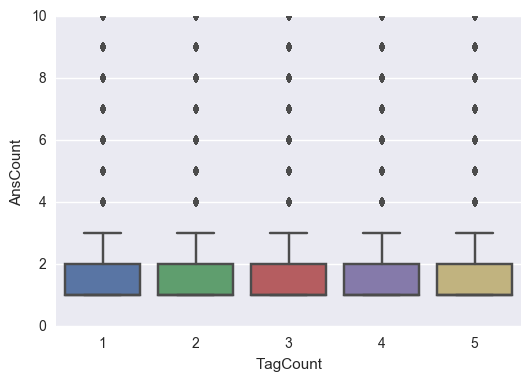

In [72]:
#scatterplot of AnswerCount against TagCount, one question with 408 answers
%matplotlib inline
ax3 = sns.boxplot(x="TagCount", y="AnsCount", data=answerstags)
plt.ylim(0, 10)

In [73]:
yearQuestTag.YearTagCount.describe()

count    137482.000000
mean         25.987053
std         311.846054
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max       28233.000000
Name: YearTagCount, dtype: float64

In [74]:
#remove noises by only including tags which were used in questions throughout a year within the 75% range
yearQuestTag = yearQuestTag.loc[yearQuestTag.YearTagCount >= 8, :]

In [75]:
sumQuestTag = pd.DataFrame(yearQuestTag.groupby('QuestCreationYear').YearTagCount.sum()).reset_index()
sumQuestTag = sumQuestTag.rename(columns={'YearTagCount':'SumYearTagCount'})

In [76]:
yearQuestTag = pd.merge(yearQuestTag, sumQuestTag, on='QuestCreationYear')

In [77]:
yearQuestTag['Proportion'] = yearQuestTag['YearTagCount'] / yearQuestTag['SumYearTagCount']

In [78]:
yearQuestTag

,QuestCreationYear,QuestTags,YearTagCount,SumYearTagCount,Proportion
0,Oct'08-09,c#,3682,65430,0.056274
1,Oct'08-09,.net,2014,65430,0.030781
2,Oct'08-09,java,1846,65430,0.028213
3,Oct'08-09,asp.net,1710,65430,0.026135
4,Oct'08-09,php,1468,65430,0.022436
5,Oct'08-09,javascript,1382,65430,0.021122
6,Oct'08-09,c++,1285,65430,0.019639
7,Oct'08-09,python,1023,65430,0.015635
8,Oct'08-09,ios,988,65430,0.015100
9,Oct'08-09,jquery,976,65430,0.014917


In [79]:
%matplotlib inline
from bokeh.charts import Bar, show, output_notebook
from bokeh.models import HoverTool
output_notebook()

def plot_percentage_change(df, creationyear1, creationyear2):
    newdf = df[(df.QuestCreationYear == creationyear1) | (df.QuestCreationYear == creationyear2)]
    newdf = newdf.copy()
    newdf['pct_ch'] = newdf.sort_values(['QuestTags','QuestCreationYear']).Proportion.pct_change()
    newdf = newdf.sort_values(['QuestTags','QuestCreationYear']).groupby('QuestTags').nth(1).reset_index()
    bar = Bar(newdf.sort_values('pct_ch',ascending=False).head(30), values='pct_ch', label='QuestTags', 
              title="Percentage Increase of Tags Used from " + creationyear1 + " to " + creationyear2, legend=False, 
                  bar_width=1.0)
    bar.xaxis.axis_label = 'Question Tags'
    bar.yaxis.axis_label = 'Percentage Increase (%)'
    show(bar)

Loading BokehJS ...

# Graph Plot 5: Percentage Increase of Tags Used Based on Year

In [80]:
plot_percentage_change(yearQuestTag, "Oct'08-09", "Oct'15-16")

# Below are done for Python Questions and Tags

In [81]:
import pandas as pd
pythonquestions = pd.read_csv("Python Questions New.csv", encoding='latin1')

In [82]:
pythonquestions.drop('Unnamed: 0', axis=1, inplace=True)
pythonquestions.rename(columns={'Id':'QuestionId', 'Tags':'QuestTags'}, inplace=True)

In [83]:
pythonquestions["CreationDate"] = pd.to_datetime(pythonquestions["CreationDate"])

In [84]:
from datetime import datetime

In [85]:
mask4 = (pythonquestions['CreationDate'] >= datetime.strptime('2008-10-15', '%Y-%m-%d')) & (pythonquestions['CreationDate'] <= datetime.strptime('2016-10-12', '%Y-%m-%d'))

In [86]:
pythonquestions = pythonquestions.loc[mask4, :]

In [87]:
pythontags = pd.read_csv("Python Tags.csv")
pythontags.rename(columns={'Id':'QuestionId', 'Tag':'QuestTags'}, inplace=True)

In [88]:
pythonquestionstags = pd.merge(pythonquestions, pythontags, on='QuestionId')

In [89]:
pythonquestionstags.ix[(pythonquestionstags['CreationDate'] >= datetime.strptime('2008-10-15', '%Y-%m-%d')) & (pythonquestionstags['CreationDate'] < datetime.strptime('2009-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'08-09"
pythonquestionstags.ix[(pythonquestionstags['CreationDate'] >= datetime.strptime('2009-10-15', '%Y-%m-%d')) & (pythonquestionstags['CreationDate'] < datetime.strptime('2010-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'09-10"
pythonquestionstags.ix[(pythonquestionstags['CreationDate'] >= datetime.strptime('2010-10-15', '%Y-%m-%d')) & (pythonquestionstags['CreationDate'] < datetime.strptime('2011-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'10-11"
pythonquestionstags.ix[(pythonquestionstags['CreationDate'] >= datetime.strptime('2011-10-15', '%Y-%m-%d')) & (pythonquestionstags['CreationDate'] < datetime.strptime('2012-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'11-12"
pythonquestionstags.ix[(pythonquestionstags['CreationDate'] >= datetime.strptime('2012-10-15', '%Y-%m-%d')) & (pythonquestionstags['CreationDate'] < datetime.strptime('2013-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'12-13"
pythonquestionstags.ix[(pythonquestionstags['CreationDate'] >= datetime.strptime('2013-10-15', '%Y-%m-%d')) & (pythonquestionstags['CreationDate'] < datetime.strptime('2014-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'13-14"
pythonquestionstags.ix[(pythonquestionstags['CreationDate'] >= datetime.strptime('2014-10-15', '%Y-%m-%d')) & (pythonquestionstags['CreationDate'] < datetime.strptime('2015-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'14-15"
pythonquestionstags.ix[(pythonquestionstags['CreationDate'] >= datetime.strptime('2015-10-15', '%Y-%m-%d')) & (pythonquestionstags['CreationDate'] < datetime.strptime('2016-10-15', '%Y-%m-%d')), 'QuestCreationYear'] = "Oct'15-16"

In [90]:
pythonquestionstags.rename(columns={'QuestTags_x':'QuestTagsList', 'QuestTags_y':'QuestTags'}, inplace=True)

# Graph Plot 1: Number of Python Questions Created Every Year

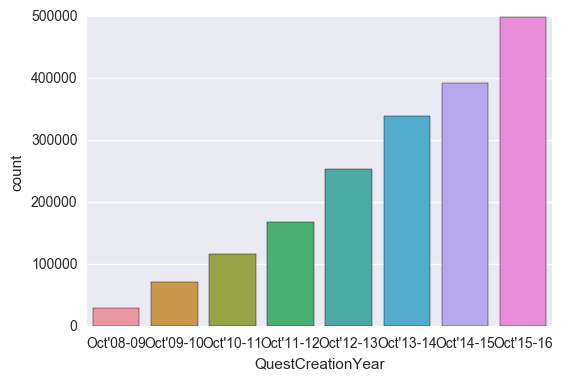

In [91]:
#number of tags used over the years
%matplotlib inline
import seaborn as sns
ax = sns.countplot(x="QuestCreationYear", data=pythonquestionstags)

In [92]:
pythonquestionstags.QuestTagsList = pythonquestionstags.QuestTagsList.apply(lambda x: x.replace('[', '').replace(']', ''))

In [93]:
pythonquestionstags.QuestTagsList = pythonquestionstags.QuestTagsList.apply(lambda x: x.split(","))

In [94]:
pythonquestionstags['TagCount'] = pythonquestionstags.QuestTagsList.apply(len)

In [95]:
pythonYearQuestTag = pd.DataFrame(pythonquestionstags.groupby('QuestCreationYear').QuestTags.value_counts().rename('YearTagCount')).reset_index()

In [96]:
pythonTopYearQuestTag = pythonYearQuestTag.groupby('QuestCreationYear').head(10)

In [97]:
pythonYearCount = pythonYearQuestTag.groupby('QuestCreationYear').YearTagCount.agg('sum').rename('TotalYearCount').reset_index()

In [98]:
pythonTopYearQuestTag = pd.merge(pythonTopYearQuestTag, pythonYearCount, on='QuestCreationYear')

In [99]:
pythonTopYearQuestTag['Percentage'] = pythonTopYearQuestTag.YearTagCount * 100 / pythonTopYearQuestTag.TotalYearCount

In [100]:
pythonTomerge = pythonTopYearQuestTag.groupby('QuestCreationYear').YearTagCount.agg('sum').rename('TopTagTotalCount').reset_index()

In [101]:
pythonTopYearQuestTag = pd.merge(pythonTopYearQuestTag, pythonTomerge, on='QuestCreationYear')

In [102]:
pythonTopYearQuestTag['PercentageAmongstTop'] = pythonTopYearQuestTag.YearTagCount * 100 / pythonTopYearQuestTag.TopTagTotalCount

In [103]:
pythonTopYearQuestTag.sort_values(['QuestCreationYear', 'QuestTags'], inplace=True)

# Graph Plot 2: Change in Top 10 Python Tags Used Over the Years

In [104]:
from bokeh.charts import Bar, show, output_notebook
from bokeh.models import HoverTool

output_notebook()

palette = ['#4B0082','#FF6347','#F0E68C','#E6E6FA','#FFF0F5','#90EE90','#ADD8E6','#F08080','#D3D3D3','#FFB6C1','#87CEFA','#20B2AA','#FFA07A','#778899','#9370DB','#40E0D0']

bar = Bar(pythonTopYearQuestTag, values='PercentageAmongstTop', label='QuestCreationYear', stack='QuestTags',
          title='Top 10 Tags Used Throughout the Years for Python', legend=False, 
              bar_width=1.0, palette=palette, tools='hover', line_color=['YearTagCount', 'PercentageAmongstTop'])

hover = bar.select(dict(type=HoverTool))
hover.tooltips = [('Tag','@QuestTags'), ('Yearly Tag Count','@YearTagCount'), 
                      ('Percentage of Tag Used','@PercentageAmongstTop{1.11}%')]

bar.xaxis.axis_label = 'Year in which Question was Created'
bar.yaxis.axis_label = 'Percentage of Top Tags Used in Questions Yearly (%)'

show(bar)

Loading BokehJS ...

In [105]:
pythonTopQuestTags = pythonquestionstags.QuestTags.value_counts()[0:15]

In [106]:
pythonTopQuestTags = pythonTopQuestTags.reset_index()
pythonTopQuestTags = pythonTopQuestTags.rename(columns= {'index':'QuestTags', 'QuestTags':'Count'})

# Graph Plot 3: Frequency of Top 15 Tags Used (in Total for All the Years)

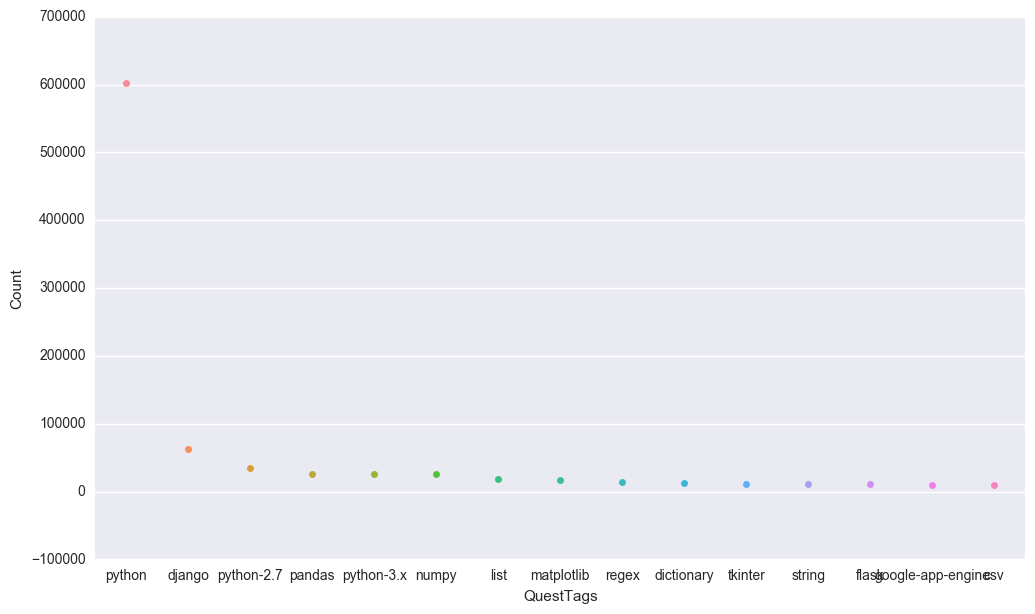

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7))
ax2 = sns.stripplot(x="QuestTags", y="Count", data=pythonTopQuestTags)

In [108]:
pythonQuestTags = pd.DataFrame(pythonquestionstags[['QuestionId', 'QuestTags']].groupby('QuestionId').QuestTags.apply(list)).reset_index()

In [109]:
pythonQuestTagList = list(pythonQuestTags.QuestTags)

In [110]:
pythonQuestTagList2 = [tag for tag in pythonQuestTagList if len(tag)>1]

In [111]:
import pyfpgrowth as fp
pythonPatterns = fp.find_frequent_patterns(pythonQuestTagList2, 1000)

In [112]:
pythonRules = fp.generate_association_rules(pythonPatterns, 0.5)

In [113]:
pythonTest = list(pythonRules.items())

In [114]:
#RHS of edges all only contain one element
# pythonTags_list = list()
# for key,value in pythonTest:
#     if len(key) > 1:
#         pythonTags_list.append([key, value[0][0], value[1]])
#     else:
#         pythonTags_list.append([key[0], value[0][0], value[1]])
        
pythonTags_list = list()
for key,value in pythonTest:
    if len(key) > 1:
        for ele in key:
            pythonTags_list.append([ele, value[0][0], value[1]])
    else:
        pythonTags_list.append([key[0], value[0][0], value[1]])

In [115]:
import networkx as nx
DG2 = nx.DiGraph()

In [116]:
items = list()
for l in pythonTags_list:
    for ele in l[:-1]:
        if ele not in items:
            items.append(ele)
DG2.add_nodes_from(items)

In [117]:
DG2.add_weighted_edges_from(pythonTags_list)

In [118]:
nx.write_gexf(DG2, "python_test.gexf")

In [119]:
pythonTagCount = pythonquestionstags.groupby('QuestionId').QuestTags.size().reset_index()
pythonTagCount = pythonTagCount.rename(columns={0:'TagCount'})

In [120]:
pythonanswers = pd.read_csv("Python Answers.csv", encoding='latin1')

In [121]:
pythonanswers.rename(columns={'Id':'AnswerId', 'ParentId':'QuestionId'}, inplace=True)

In [122]:
pythonAnswerCount = pythonanswers.groupby('QuestionId').AnswerId.size().reset_index()

In [123]:
pythonAnswerCount = pythonAnswerCount.rename(columns={0:'AnsCount'})

In [124]:
pythonAnswerstags = pd.merge(pythonAnswerCount, pythonTagCount, on='QuestionId')

# Graph Plot 4: Number of Answers Against Number of Python Tags Used in Python Questions

In [125]:
import numpy
numpy.corrcoef(list(pythonAnswerstags.TagCount), list(pythonAnswerstags.AnsCount))[0,1]

-0.099691138487314354

(0, 10)

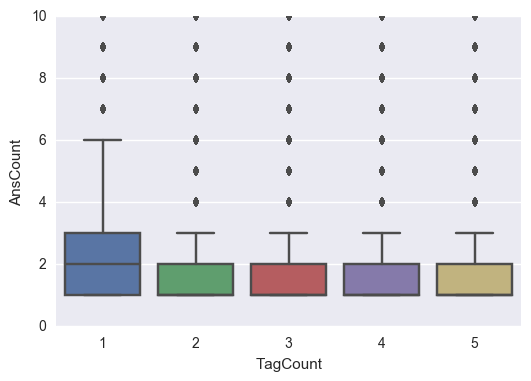

In [126]:
#scatterplot of AnswerCount against TagCount, one question with 408 answers
%matplotlib inline
ax4 = sns.boxplot(x="TagCount", y="AnsCount", data=pythonAnswerstags)
plt.ylim(0, 10)

In [127]:
pythonYearQuestTag.YearTagCount.describe()

count     57072.000000
mean         32.746583
std        1079.978650
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max      157453.000000
Name: YearTagCount, dtype: float64

In [128]:
#remove noises by only including tags which were used in questions throughout a year within the 75% range
pythonYearQuestTag = pythonYearQuestTag.loc[pythonYearQuestTag.YearTagCount >= 8, :]
pythonSumQuestTag = pd.DataFrame(pythonYearQuestTag.groupby('QuestCreationYear').YearTagCount.sum()).reset_index()
pythonSumQuestTag = pythonSumQuestTag.rename(columns={'YearTagCount':'SumYearTagCount'})
pythonYearQuestTag = pd.merge(pythonYearQuestTag, pythonSumQuestTag, on='QuestCreationYear')
pythonYearQuestTag['Proportion'] = pythonYearQuestTag['YearTagCount'] / pythonYearQuestTag['SumYearTagCount']

# Percentage Change of Top 30 Common Python Tags from Oct'08-09 to Oct'15-16

In [129]:
plot_percentage_change(pythonYearQuestTag, "Oct'08-09", "Oct'15-16")

# Stack Overflow 10% Sample: Finding more trends about Answers

In [130]:
sample = pd.merge(stackSampleAnswers, stackSampleQuestions[['QuestionId','QuestCreationDate']])

In [131]:
sample = sample.drop_duplicates(subset=['AnswerId'])

In [132]:
sample["AnsCreationDate"] = pd.to_datetime(sample["AnsCreationDate"])

In [133]:
sample["QuestCreationDate"] = pd.to_datetime(sample["QuestCreationDate"])

In [134]:
sample['DayGap']=(sample.AnsCreationDate - sample.QuestCreationDate).astype(pd.Timedelta).apply(lambda x:x.days)

In [135]:
sample = sample.loc[sample.DayGap >= 0, :]

In [136]:
FirstWeekCount = sample[sample.DayGap <= 7].groupby('QuestionId').AnswerId.count().rename('FirstWeekAnsCount').reset_index()

In [137]:
FirstMonthCount = sample[(7 < sample.DayGap) & (sample.DayGap <= 31)].groupby('QuestionId').AnswerId.count().rename('FirstMonthAnsCount').reset_index()

In [138]:
SixMonthsCount = sample[(31 < sample.DayGap) & (sample.DayGap <= 186)].groupby('QuestionId').AnswerId.count().rename('SixMonthsAnsCount').reset_index()

In [139]:
MoreMonthsCount = sample[186 < sample.DayGap].groupby('QuestionId').AnswerId.count().rename('MoreMonthsAnsCount').reset_index()

In [140]:
#QuestionId is unique
ansCount = pd.merge(FirstWeekCount, FirstMonthCount, on='QuestionId', how='outer')
ansCount = pd.merge(ansCount, SixMonthsCount, on='QuestionId', how='outer')
ansCount = pd.merge(ansCount, MoreMonthsCount, on='QuestionId', how='outer')

In [141]:
ansCount = ansCount.fillna(0)

In [142]:
tagcount = pd.DataFrame(stackQuestionsTags.QuestionId.value_counts()).reset_index()

In [143]:
tagcount.rename(columns={'index':'QuestionId', 'QuestionId':'TagCount'}, inplace=True)

In [144]:
ansCount = pd.merge(ansCount, tagcount, on='QuestionId').drop_duplicates('QuestionId')

In [145]:
import numpy as np
ansCount['<= 7 Days'] = list(np.where(ansCount['FirstWeekAnsCount']>0, 1, 0))

In [146]:
ansCount['8 - 31 Days'] = list(np.where(ansCount['FirstMonthAnsCount']>0, 1, 0))

In [147]:
ansCount['32 - 186 Days'] = list(np.where(ansCount['SixMonthsAnsCount']>0, 1, 0))

In [148]:
ansCount['> 186 Days'] = list(np.where(ansCount['MoreMonthsAnsCount']>0, 1, 0))

In [149]:
ansCount['total'] = ansCount['<= 7 Days']+ansCount['8 - 31 Days']+ansCount['32 - 186 Days']+ansCount['> 186 Days']

In [150]:
ansCount.loc[ansCount.TagCount == 1,'<= 7 Days (%)'] = ansCount[ansCount.TagCount == 1]['<= 7 Days']/ansCount[ansCount.TagCount == 1]['<= 7 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 2,'<= 7 Days (%)'] = ansCount[ansCount.TagCount == 2]['<= 7 Days']/ansCount[ansCount.TagCount == 2]['<= 7 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 3,'<= 7 Days (%)'] = ansCount[ansCount.TagCount == 3]['<= 7 Days']/ansCount[ansCount.TagCount == 3]['<= 7 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 4,'<= 7 Days (%)'] = ansCount[ansCount.TagCount == 4]['<= 7 Days']/ansCount[ansCount.TagCount == 4]['<= 7 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 5,'<= 7 Days (%)'] = ansCount[ansCount.TagCount == 5]['<= 7 Days']/ansCount[ansCount.TagCount == 5]['<= 7 Days'].count() * 100

In [151]:
ansCount.loc[ansCount.TagCount == 1,'8 - 31 Days (%)'] = ansCount[ansCount.TagCount == 1]['8 - 31 Days']/ansCount[ansCount.TagCount == 1]['8 - 31 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 2,'8 - 31 Days (%)'] = ansCount[ansCount.TagCount == 2]['8 - 31 Days']/ansCount[ansCount.TagCount == 2]['8 - 31 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 3,'8 - 31 Days (%)'] = ansCount[ansCount.TagCount == 3]['8 - 31 Days']/ansCount[ansCount.TagCount == 3]['8 - 31 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 4,'8 - 31 Days (%)'] = ansCount[ansCount.TagCount == 4]['8 - 31 Days']/ansCount[ansCount.TagCount == 4]['8 - 31 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 5,'8 - 31 Days (%)'] = ansCount[ansCount.TagCount == 5]['8 - 31 Days']/ansCount[ansCount.TagCount == 5]['8 - 31 Days'].count() * 100

In [152]:
ansCount.loc[ansCount.TagCount == 1,'32 - 186 Days (%)'] = ansCount[ansCount.TagCount == 1]['32 - 186 Days']/ansCount[ansCount.TagCount == 1]['32 - 186 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 2,'32 - 186 Days (%)'] = ansCount[ansCount.TagCount == 2]['32 - 186 Days']/ansCount[ansCount.TagCount == 2]['32 - 186 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 3,'32 - 186 Days (%)'] = ansCount[ansCount.TagCount == 3]['32 - 186 Days']/ansCount[ansCount.TagCount == 3]['32 - 186 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 4,'32 - 186 Days (%)'] = ansCount[ansCount.TagCount == 4]['32 - 186 Days']/ansCount[ansCount.TagCount == 4]['32 - 186 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 5,'32 - 186 Days (%)'] = ansCount[ansCount.TagCount == 5]['32 - 186 Days']/ansCount[ansCount.TagCount == 5]['32 - 186 Days'].count() * 100

In [153]:
ansCount.loc[ansCount.TagCount == 1,'> 186 Days (%)'] = ansCount[ansCount.TagCount == 1]['> 186 Days']/ansCount[ansCount.TagCount == 1]['> 186 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 2,'> 186 Days (%)'] = ansCount[ansCount.TagCount == 2]['> 186 Days']/ansCount[ansCount.TagCount == 2]['> 186 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 3,'> 186 Days (%)'] = ansCount[ansCount.TagCount == 3]['> 186 Days']/ansCount[ansCount.TagCount == 3]['> 186 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 4,'> 186 Days (%)'] = ansCount[ansCount.TagCount == 4]['> 186 Days']/ansCount[ansCount.TagCount == 4]['> 186 Days'].count() * 100
ansCount.loc[ansCount.TagCount == 5,'> 186 Days (%)'] = ansCount[ansCount.TagCount == 5]['> 186 Days']/ansCount[ansCount.TagCount == 5]['> 186 Days'].count() * 100

In [171]:
ansCount.head()

,QuestionId,FirstWeekAnsCount,FirstMonthAnsCount,SixMonthsAnsCount,MoreMonthsAnsCount,TagCount,<= 7 Days,8 - 31 Days,32 - 186 Days,> 186 Days,total,<= 7 Days (%),8 - 31 Days (%),32 - 186 Days (%),> 186 Days (%),total number of questions for each tag count
0,203340.0,4.0,0.0,5.0,2.0,1,1,0,1,1,3,0.00081,0.0,0.00081,0.00081,123497.0
642538,26650590.0,1.0,0.0,0.0,0.0,1,1,0,0,0,1,0.00081,0.0,0.00000,0.00000,123497.0
642547,26650870.0,5.0,0.0,0.0,0.0,1,1,0,0,0,1,0.00081,0.0,0.00000,0.00000,123497.0
644924,26745150.0,1.0,0.0,0.0,0.0,1,1,0,0,0,1,0.00081,0.0,0.00000,0.00000,123497.0
644904,26744200.0,1.0,0.0,0.0,0.0,1,1,0,0,0,1,0.00081,0.0,0.00000,0.00000,123497.0


In [168]:
#number of answers in first 7 days for tag count 1/ total number of questions asked with tag count 1
#each column is tag count,
ansCount.loc[ansCount.TagCount == 1, 'total number of questions for each tag count'] = len(ansCount[ansCount.TagCount == 1])
ansCount.loc[ansCount.TagCount == 2, 'total number of questions for each tag count'] = len(ansCount[ansCount.TagCount == 2])
ansCount.loc[ansCount.TagCount == 3, 'total number of questions for each tag count'] = len(ansCount[ansCount.TagCount == 3])
ansCount.loc[ansCount.TagCount == 4, 'total number of questions for each tag count'] = len(ansCount[ansCount.TagCount == 4])
ansCount.loc[ansCount.TagCount == 5, 'total number of questions for each tag count'] = len(ansCount[ansCount.TagCount == 5])

In [172]:
ansCount['Avg_FirstWeekCount'] = ansCount['FirstWeekAnsCount'] / ansCount['total number of questions for each tag count']
ansCount['Avg_FirstMonthCount'] = ansCount['FirstMonthAnsCount'] / ansCount['total number of questions for each tag count']
ansCount['Avg_SixMonthsCount'] = ansCount['SixMonthsAnsCount'] / ansCount['total number of questions for each tag count']
ansCount['Avg_MoreMonthsCount'] = ansCount['MoreMonthsAnsCount'] / ansCount['total number of questions for each tag count']

In [155]:
%matplotlib inline
from bokeh.charts import Bar, output_notebook, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend

ansCount = ansCount[ansCount['total'] > 0]
ansCount = ansCount.sort_values('TagCount', ascending=True)

bar9 = Bar(ansCount,
          values=blend('<= 7 Days (%)', '8 - 31 Days (%)', '32 - 186 Days (%)', '> 186 Days (%)', name='anscounts', labels_name='anscount'),
          label=cat(columns='TagCount', sort=False),
          group=cat(columns='anscount', sort=False),
          color=color(columns='anscount', palette=['Turquoise','DarkSalmon','Plum','Gold'],
                      sort=False),
          legend='top_right',
          title="Percentage of Questions Answered vs No. of Tags Used",
          tooltips=[('No. of Tags Used', '@TagCount'), 
                    ('Percentage of Questions Answered', '@height{1.11}%')
                   ])

bar9.xaxis.axis_label = 'No. of Tags Used in Questions'
bar9.yaxis.axis_label = 'Percentage of Questions Answered within 1st Week/Month of Posting'

output_notebook()

show(bar9)

Loading BokehJS ...

In [177]:
%matplotlib inline
from bokeh.charts import Bar, output_notebook, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend

ansCount = ansCount[ansCount['total'] > 0]
ansCount = ansCount.sort_values('TagCount', ascending=True)

bar10 = Bar(ansCount,
          values=blend('Avg_FirstWeekCount', 'Avg_FirstMonthCount', 'Avg_SixMonthsCount', 'Avg_MoreMonthsCount', name='anscounts', labels_name='anscount'),
          label=cat(columns='TagCount', sort=False),
          group=cat(columns='anscount', sort=False),
          color=color(columns='anscount', palette=['Turquoise','DarkSalmon','Plum','Gold'],
                      sort=False),
          legend='top_right',
          title="Average No. of Answers Received vs No. of Tags Used",
          tooltips=[('No. of Tags Used', '@TagCount'), 
                    ('Average No. of Answers Received', '@height')
                   ])

bar10.xaxis.axis_label = 'No. of Tags Used in Questions'
bar10.yaxis.axis_label = 'Average No. of Answers Received within Time Period'
        
output_notebook()

show(bar10)

Loading BokehJS ...